## Cell 1: Data Preparation /  Model selection and Training

In [34]:
# CELL 0 — Reset ALL Stored Variables
# ============================

for var in ["model_results", "model_reports"]:
    if var in globals():
        del globals()[var]

print("✅ Reset complete. Now run Cell 1 again.")

✅ Reset complete. Now run Cell 1 again.


In [45]:
# ============================
# CELL 1 — Load + Split + Scale + Train Model
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1. Load dataset
# ----------------------------
df = pd.read_csv("poker_balanced_10k.csv")

# Features (X) and labels (y)
X = df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5']]
y = df['ORD']

# ----------------------------
# 2. Train / Validation / Test Split  (70 / 15 / 15)
# ----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

# ----------------------------
# 3. Scale all data  (StandardScaler)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# 4. Define model  << YOU EDIT ONLY THIS PART >>
# ----------------------------

# ✅ KNN
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=1)
# model_name = "KNN (k=1)"

# ✅ Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state=42)
model_name = "Random Forest (n=300)"

# ✅ Gradient Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier(random_state=42)
# model_name = "Gradient Boosting"

# ✅ XGBoost
# from xgboost import XGBClassifier
# model = XGBClassifier(tree_method='hist', eval_metric='mlogloss', random_state=42)
# model_name = "XGBoost"

# ----------------------------
# 5. Train the model
# ----------------------------
model.fit(X_train_scaled, y_train)
print(f"\n✅ Model training complete: {model_name}")


Train size: 7000
Validation size: 1500
Test size: 1500

✅ Model training complete: Random Forest (n=300)


## Cell 2: Prediction and Evaluation / Result Save for comparison

In [ ]:
# ============================
# CELL 2 — Evaluate Model + Store Results
# ============================

from sklearn.metrics import accuracy_score, classification_report, f1_score
import pandas as pd

# ----------------------------
# 1. Predict
# ----------------------------
y_val_pred  = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# ----------------------------
# 2. Accuracy
# ----------------------------
val_acc  = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Validation Accuracy: {val_acc:.4f}")
print(f"✅ Test Accuracy:        {test_acc:.4f}\n")

# ----------------------------
# 3. Classification Report
# ----------------------------
print("=== Classification Report (Test Set) ===")
current_report = classification_report(y_test, y_test_pred, digits=3)
# print(current_report)

# ----------------------------
# 4. F1 Scores
# ----------------------------
macro_f1    = f1_score(y_test, y_test_pred, average='macro')
weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')

# print(f"Macro F1 Score:    {macro_f1:.4f}")
# print(f"Weighted F1 Score: {weighted_f1:.4f}")

# ----------------------------
# 5. Initialize storage (first run only)
# ----------------------------
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])

if 'model_reports' not in globals():
    model_reports = {}

# ----------------------------
# 6. Save / Update result
# ----------------------------
if model_name in model_results["Model"].values:
    # overwrite existing row
    model_results.loc[model_results["Model"] == model_name, ["Accuracy", "Macro F1", "Weighted F1"]] = [
        test_acc, macro_f1, weighted_f1
    ]
else:
    # add new row
    new_row = pd.DataFrame([[model_name, test_acc, macro_f1, weighted_f1]], 
                           columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])
    model_results = pd.concat([model_results, new_row], ignore_index=True)

model_reports[model_name] = current_report

print(f"\n📌 Results stored for model: {model_name}\n")

# ----------------------------
# 7. Display accumulated model scores
# ----------------------------
print("📊 Models evaluated so far:")
display(model_results.style.format({
    "Accuracy": "{:.4f}",
    "Macro F1": "{:.4f}",
    "Weighted F1": "{:.4f}"
}))

# ----------------------------
# 8. Display all classification reports
# ----------------------------
print("\n📄 Stored Classification Reports:\n")
for name, report in model_reports.items():
    print(f"----- {name} -----")
    print(report)
    print("\n")

print("\n✅ Cell 2 complete.\n")


✅ Validation Accuracy: 0.8393
✅ Test Accuracy:        0.8520

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0      0.914     0.567     0.700       150
           1      0.720     0.567     0.634       150
           2      0.752     0.807     0.778       150
           3      0.727     0.673     0.699       150
           4      0.920     1.000     0.958       150
           5      0.914     0.987     0.949       150
           6      0.758     0.920     0.831       150
           7      0.824     1.000     0.904       150
           8      1.000     1.000     1.000       150
           9      1.000     1.000     1.000       150

    accuracy                          0.852      1500
   macro avg      0.853     0.852     0.845      1500
weighted avg      0.853     0.852     0.845      1500

Macro F1 Score:    0.8453
Weighted F1 Score: 0.8453

📌 Results stored for model: Random Forest (n=300)

📊 Models evaluated so far:


,Model,Accuracy,Macro F1,Weighted F1
0,KNN (k=1),0.6413,0.6270,0.6270
1,Random Forest (n=300),0.8520,0.8453,0.8453



📄 Stored Classification Reports:

----- KNN (k=1) -----
              precision    recall  f1-score   support

           0      0.506     0.287     0.366       150
           1      0.327     0.240     0.277       150
           2      0.438     0.400     0.418       150
           3      0.438     0.420     0.429       150
           4      0.648     0.773     0.705       150
           5      0.879     0.967     0.921       150
           6      0.489     0.573     0.528       150
           7      0.577     0.753     0.653       150
           8      0.955     1.000     0.977       150
           9      0.993     1.000     0.997       150

    accuracy                          0.641      1500
   macro avg      0.625     0.641     0.627      1500
weighted avg      0.625     0.641     0.627      1500



----- Random Forest (n=300) -----
              precision    recall  f1-score   support

           0      0.914     0.567     0.700       150
           1      0.720     0.567     0

## Cell 3: Visualize Current Model Performance Graph

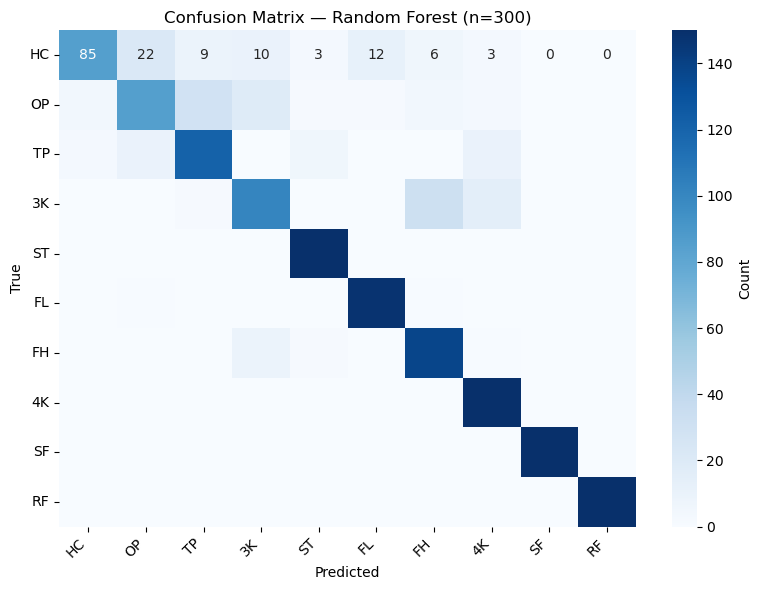

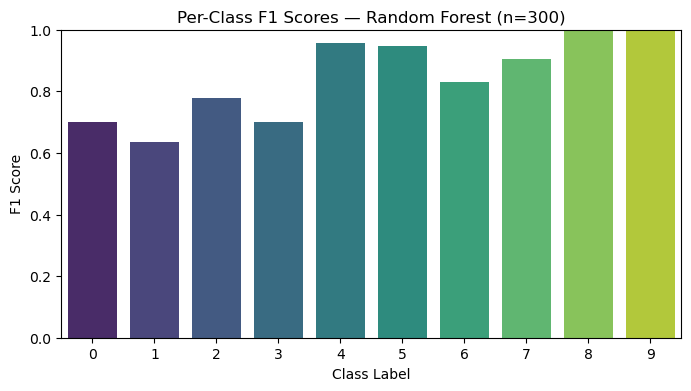

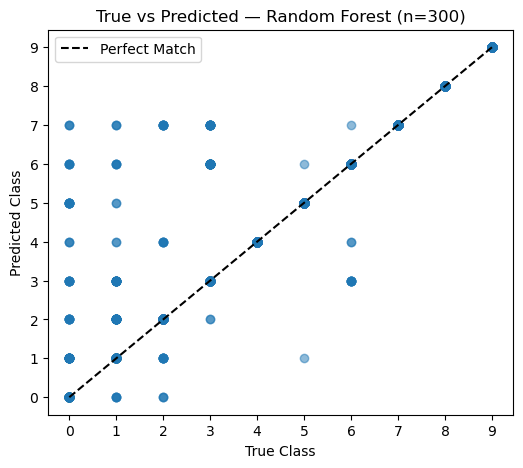


📌 MODEL SUMMARY
Model Used:        Random Forest (n=300)
Test Accuracy:     0.8520
Macro F1 Score:    0.8453
Weighted F1 Score: 0.8453

✅ Cell 3 complete — ready for next model.



In [47]:
# ============================
# CELL 3 — Visualize Current Model
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# ----------------------------
# 1. Confusion Matrix
# ----------------------------
# ============================
# Confusion Matrix with Poker Labels
# ============================

poker_labels_short = [
    "HC", "OP", "TP", "3K", "ST",
    "FL", "FH", "4K", "SF", "RF"
]
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=poker_labels_short,
    yticklabels=poker_labels_short,
    cbar_kws={"label": "Count"}   # ✅ add colorbar label
)
plt.title(f"Confusion Matrix — {model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Per-Class F1 Bar Chart
# ----------------------------
from sklearn.metrics import f1_score

class_f1 = f1_score(y_test, y_test_pred, average=None)
plt.figure(figsize=(8,4))
sns.barplot(x=list(range(10)), y=class_f1, palette="viridis")
plt.title(f"Per-Class F1 Scores — {model_name}")
plt.xlabel("Class Label")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

# ----------------------------
# 3. True vs Predicted Scatter
# ----------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0,9], [0,9], 'k--', label="Perfect Match")
plt.title(f"True vs Predicted — {model_name}")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.xticks(range(10))
plt.yticks(range(10))
plt.legend()
plt.show()

# ----------------------------
# 4. Summary Readable Output
# ----------------------------
print("\n📌 MODEL SUMMARY")
print(f"Model Used:        {model_name}")
print(f"Test Accuracy:     {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Macro F1 Score:    {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

print("\n✅ Cell 3 complete — ready for next model.\n")


## Cell 4. Comparison

,Model,Accuracy,Macro F1,Weighted F1
0,KNN (k=1),0.6413,0.6270,0.6270


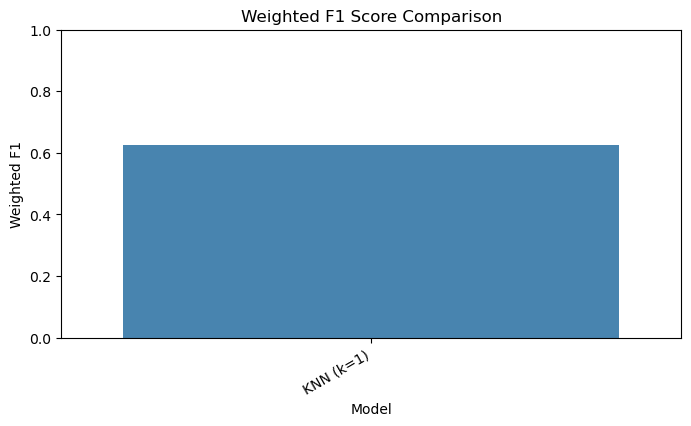

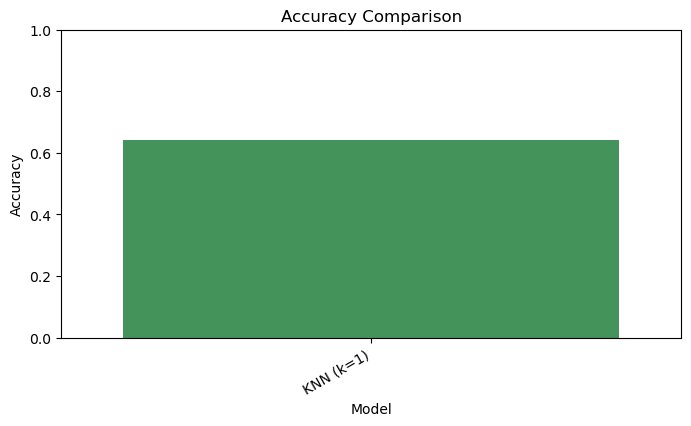

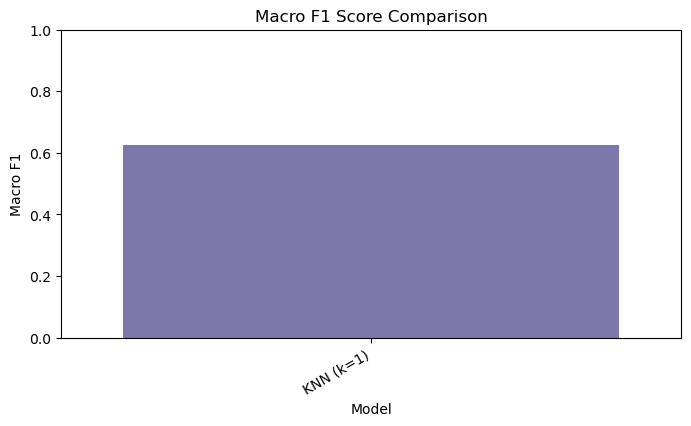


✅ Cell 4 complete — all model comparison shown.



In [44]:
# ============================
# CELL 4 — Compare All Models Run So Far
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Convert stored results to DataFrame
# ----------------------------
try:
    results_df = pd.DataFrame(model_results)
except NameError:
    raise ValueError("⚠️ No stored results found. Run Cell 2 at least once.")

display(results_df.style.format({
    "Accuracy": "{:.4f}",
    "Macro F1": "{:.4f}",
    "Weighted F1": "{:.4f}"
}))

# ----------------------------
# 2. Bar Plot — Weighted F1 Comparison
# ----------------------------
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="Weighted F1", palette="Blues_d")
plt.title("Weighted F1 Score Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.show()

# ----------------------------
# 3. Bar Plot — Accuracy Comparison
# ----------------------------
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Greens_d")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.show()

# ----------------------------
# 4. Bar Plot — Macro F1 Comparison
# ----------------------------
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="Macro F1", palette="Purples_d")
plt.title("Macro F1 Score Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.show()

print("\n✅ Cell 4 complete — all model comparison shown.\n")
